## Instructions






Perform a linear regression using the Auto MPG dataset (loaded for you in the setup section).

Incorporate the following aspects:

  1. Data
     + Load the data.
     + Explore the data, including distributions, correlation, etc. Make plots.
     + Check for null values. Handle null values by dropping or imputing.
     + Choose target and feature(s).
     + Encode features as necessary (ordinal vs one-hot).
     + Scale / normalize features as necessary.
     + Split into train and test sets (specifically 80/20 split). Remember to use a random seed to ensure your results are reproducible.
  2. Model
    + Use a `LinearRegression` model from sklearn.
    + Train the model using the training data.
    + Inspect artifacts from the training process:
      + Print the model's coeficients and intercept (i.e. line of best fit).
      + Inspect the coefficients by wrapping them in a pandas Series and labeling them with their corresponding feature names, then sort them in descending order.
      + Interpret the coefficients - which features contribute most to our model's predictive ability?
  3. Evaluation
    + Make predictions for the test set.
    + Evaluate the results using sklearn regression metrics, specifically the r-squared score and mean squared error (MSE). Calculate the Root Mean Squared Error (RMSE) as well, based on the MSE. Interpret the results - how well did the model do?




## Setup

In [20]:
from warnings import filterwarnings
filterwarnings("ignore")

In [21]:
%%capture
!pip install ucimlrepo

## Data Loading


### Auto MPG Dataset

https://archive.ics.uci.edu/dataset/9/auto+mpg

The Auto MPG dataset provides information about automobile fuel efficiency, in terms of miles per gallon (MPG).

We'll be using a version of this dataset hosted by UCI. They have a great repository of machine learning datasets, and now a cool new website and python package we can use to load the data easily:


In [83]:
from ucimlrepo import fetch_ucirepo

repo = fetch_ucirepo(id=9)
print(type(repo)) # assuming this is dictionary-like

<class 'ucimlrepo.dotdict.dotdict'>


In [84]:
repo.keys()

dict_keys(['data', 'metadata', 'variables'])

Repo has data, metadata (dataset description), and variables (data dictionary of sorts).

In [85]:
repo.metadata

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [86]:
repo.variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


We see the target is "mpg" and there are a number of features - some continuous, some categorical. We'll need to further investigate and decide how to encode the categorical features.

We see there are some missing values in the "horsepower" column. We'll need to handle them later.

Finally, here is our dataset:

In [87]:
# auto_mpg.data.keys()

In [88]:
# print(type(auto_mpg.data.features))
# print(type(auto_mpg.data.targets))
# print(type(auto_mpg.data.ids))

In [89]:
df = repo.data.original
df.head()

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


What's the "origin" feature about?

One can possibly interpret from the car names, or consult various [internet](https://rstudio-pubs-static.s3.amazonaws.com/516461_09a0ec8250df45c4bb362c97ad7fd965.html) [resources](https://www.kaggle.com/code/asokraju/auto-mpg-dataset), that mention the following mapping: (1: USA, 2: Europe, 3: Asia).

In [90]:
df[df["origin"] == 1]["car_name"]
df[df["origin"] == 2]["car_name"]
df[df["origin"] == 3]["car_name"]

14     toyota,corona,mark,ii
18              datsun,pl510
29              datsun,pl510
31             toyota,corona
53       toyota,corolla,1200
               ...          
382           toyota,corolla
383              honda,civic
384       honda,civic,(auto)
385            datsun,310,gx
390         toyota,celica,gt
Name: car_name, Length: 79, dtype: object

In [91]:
ORIGINS_MAP = {1: "usa", 2: "europe", 3: "asia"}
df["origin"] = df["origin"].map(ORIGINS_MAP)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,usa,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,usa,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,usa,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,usa,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,usa,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,usa,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,europe,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,usa,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,usa,28.0


## Solution

### Data Exploration and Preprocessing

In [121]:
# Importing Packages
import math
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pandas import get_dummies as one_hot_encode
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [92]:
# Value counts for varibales
for i in df:
    print(df[i].value_counts())

ford,pinto             6
toyota,corolla         5
amc,matador            5
ford,maverick          5
chevrolet,chevette     4
                      ..
chevrolet,monza,2+2    1
ford,mustang,ii        1
pontiac,astro          1
amc,pacer              1
chevy,s-10             1
Name: car_name, Length: 305, dtype: int64
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 82, dtype: int64
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: horsepower, Length: 93, dtype: int64
1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: weight, Length: 351, dtype: int64
14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1   

In [104]:
# Unique Values for varibales
for i in df:
    print(i+":",len(df[i].unique()))

car_name: 305
cylinders: 5
displacement: 82
horsepower: 94
weight: 351
acceleration: 95
model_year: 13
origin: 3
mpg: 129


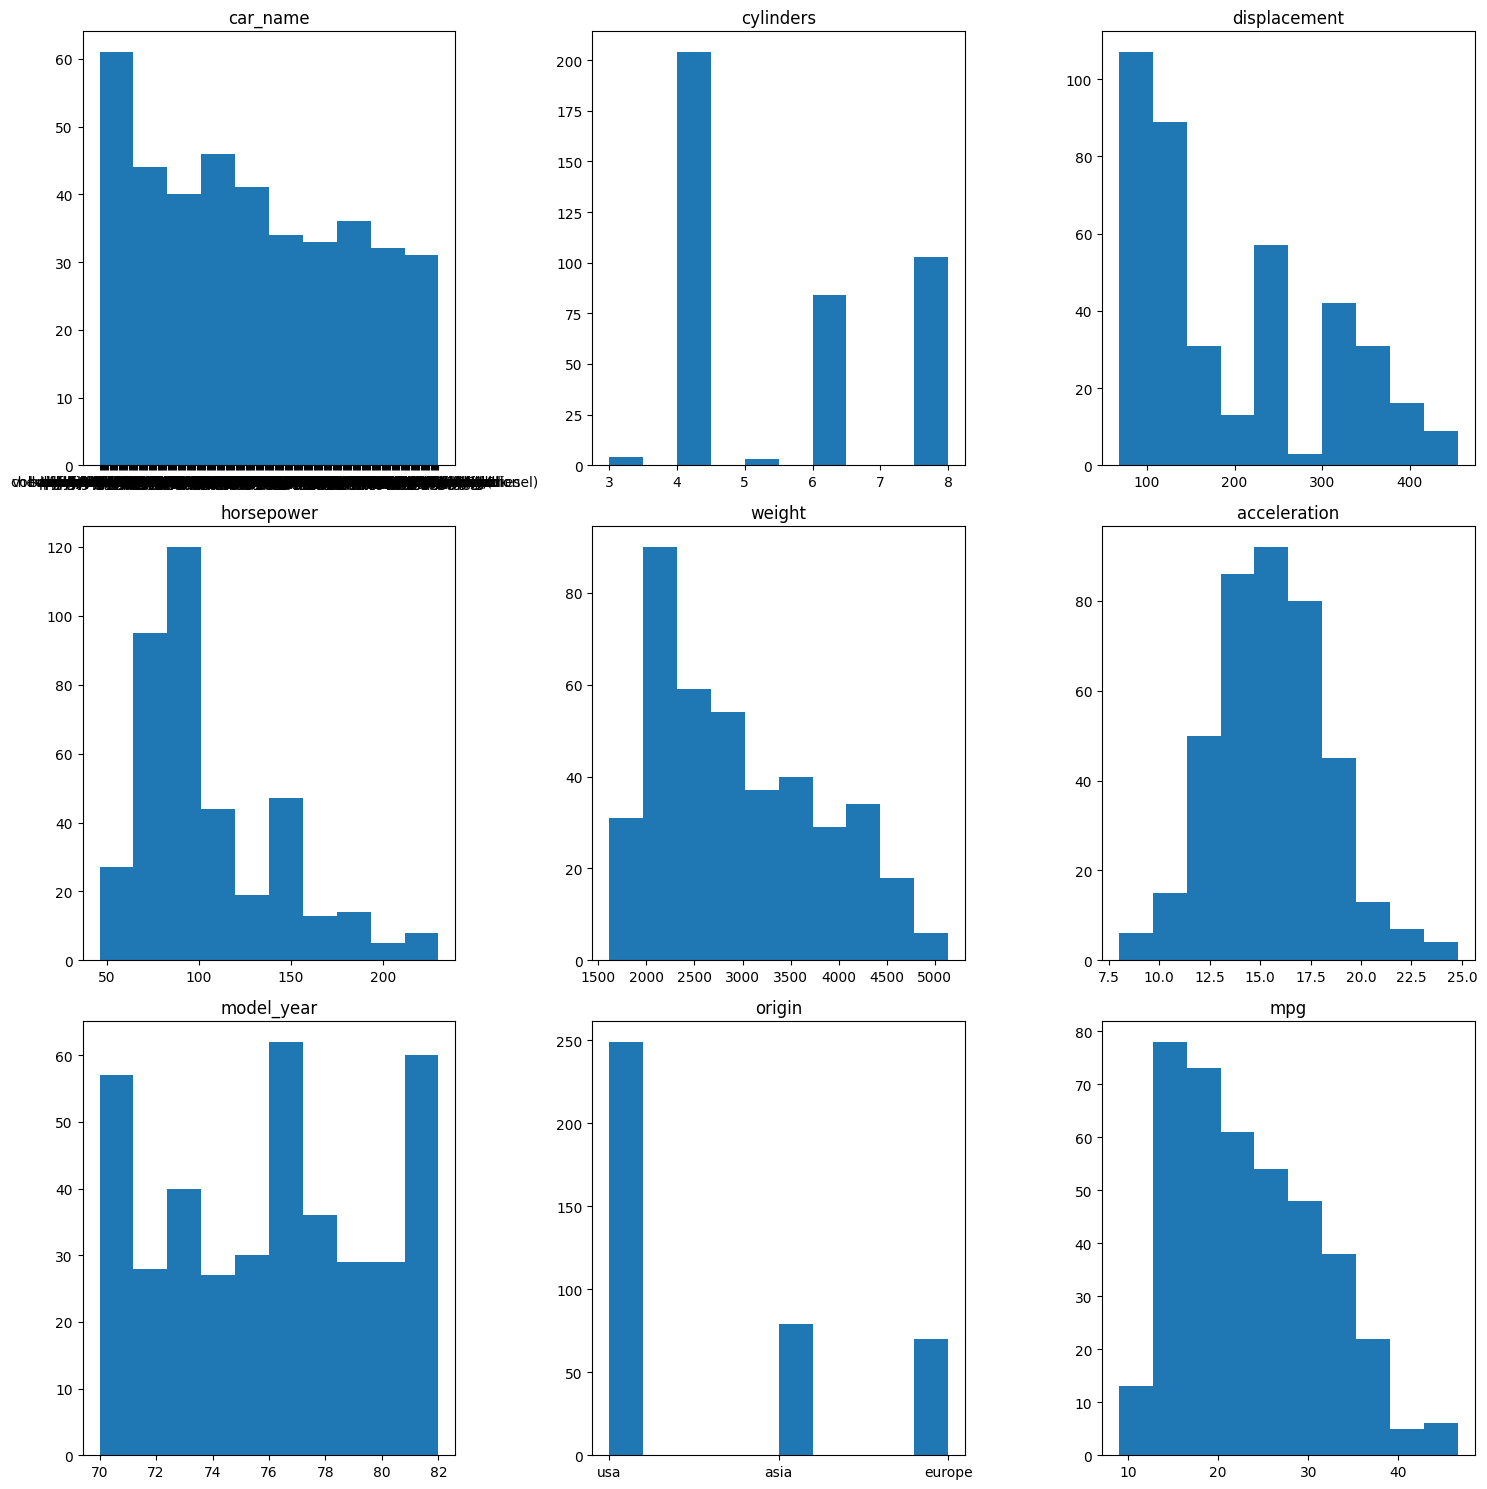

In [112]:
# histograms for varibales
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    axes[i].hist(df[column])
    axes[i].set_title(column)
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [119]:
# Correlation
correlation = df.corr()
fig = px.imshow(correlation, labels=dict(color="Correlation"), x=correlation.index, y=correlation.columns, color_continuous_scale="reds",zmin=-1,zmax=1,color_continuous_midpoint=0)
fig.update_layout(width=800, height=800, xaxis_showgrid=False, yaxis_showgrid=False)
fig.show()

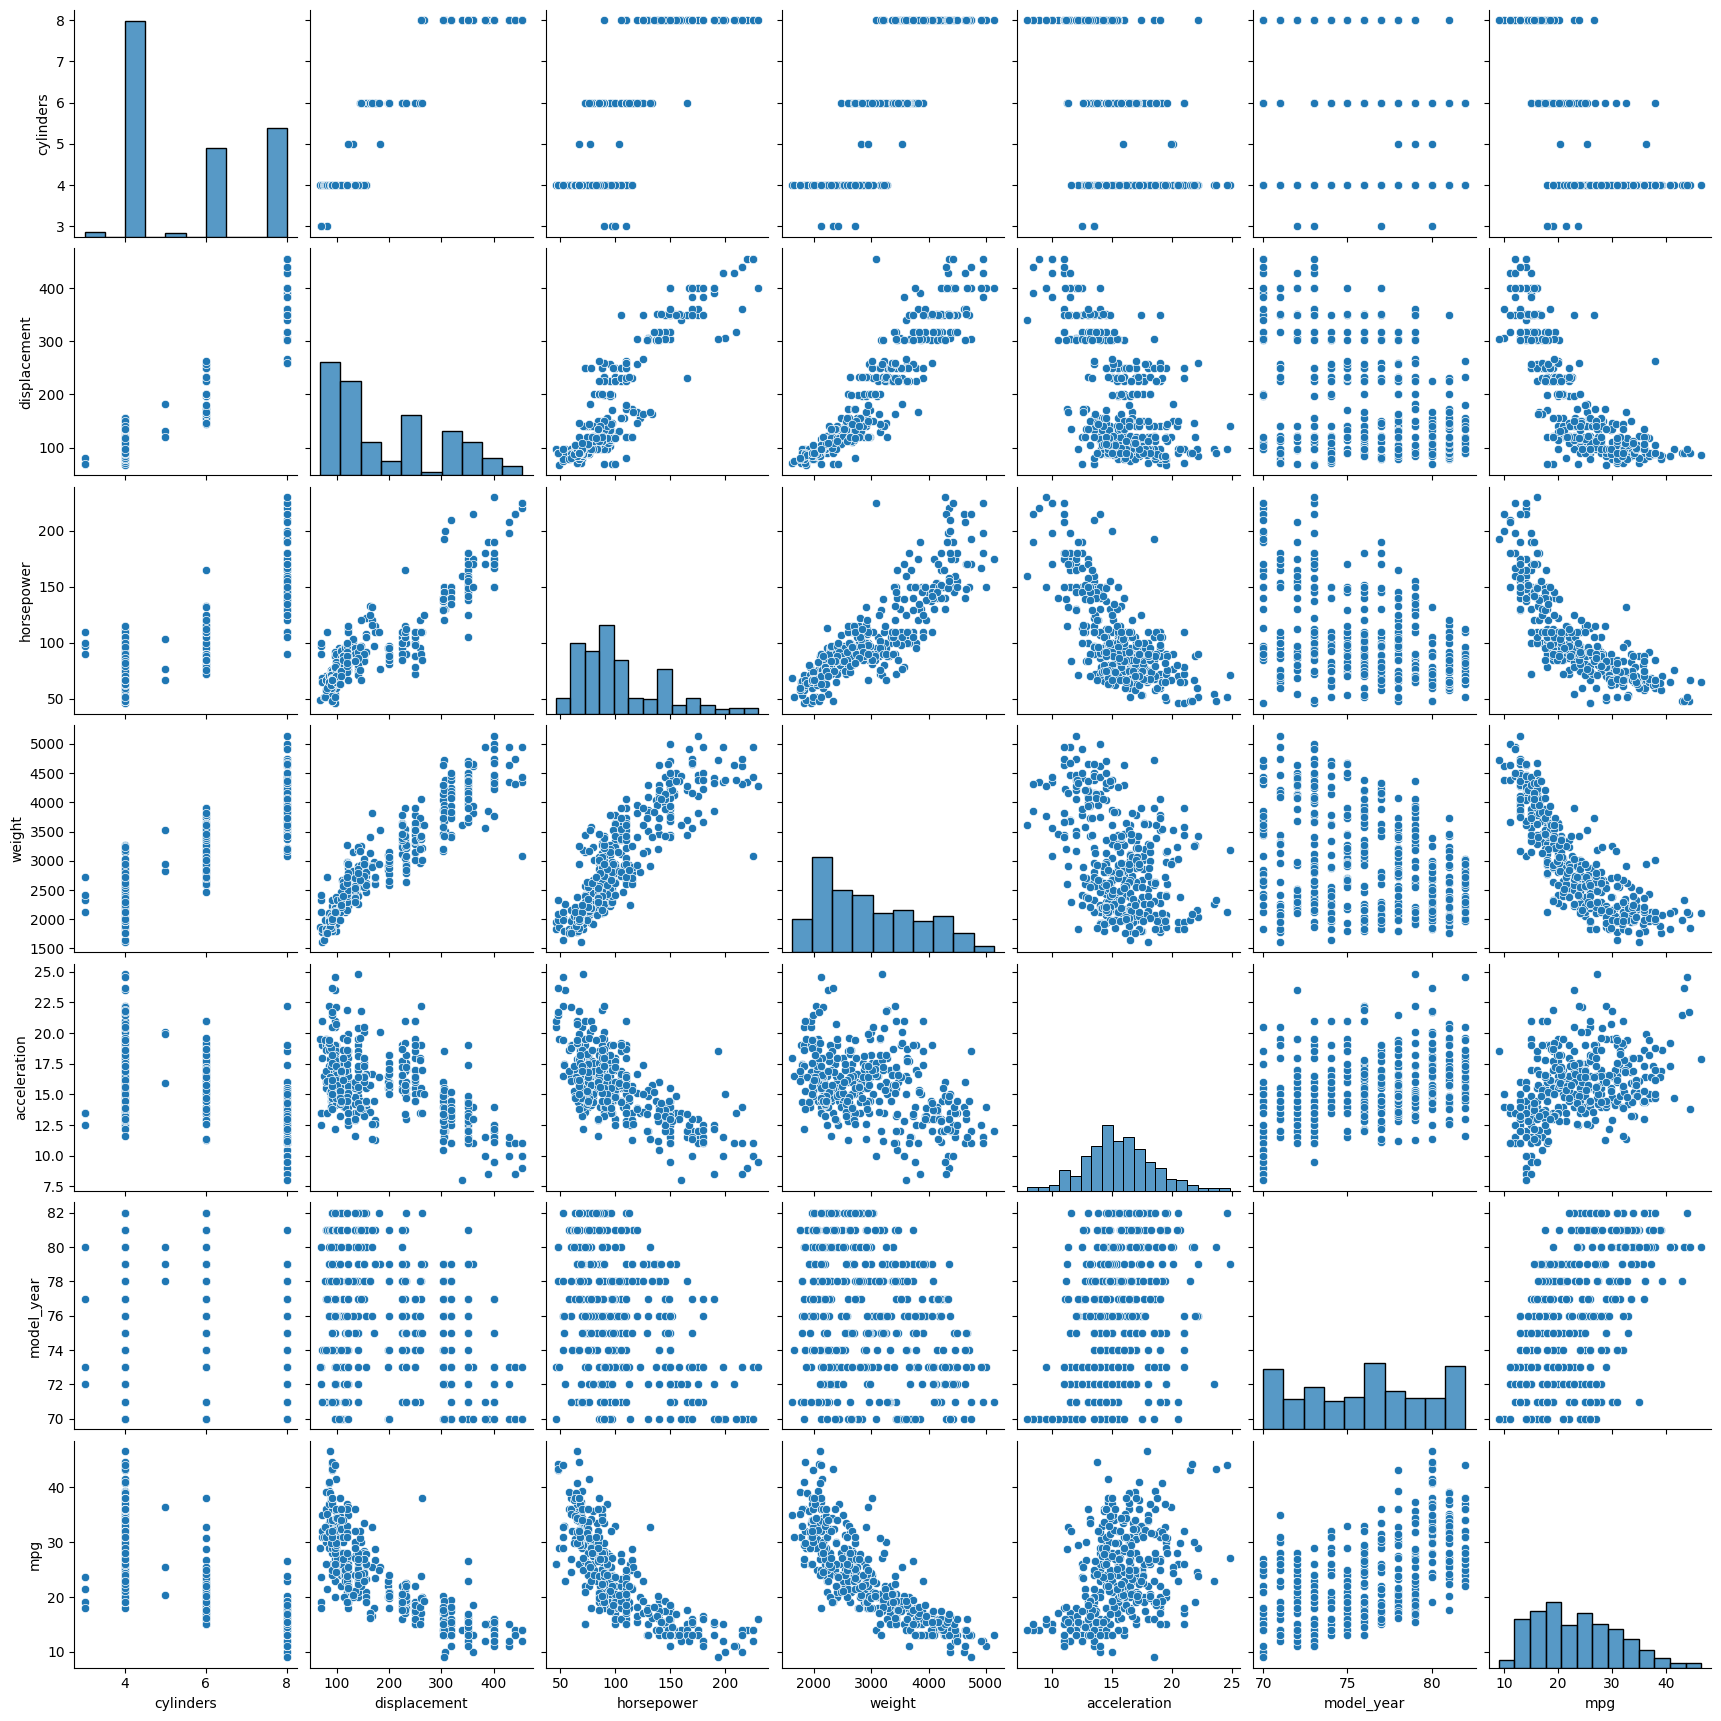

In [122]:
# Pair Plot
sns.pairplot(df.drop(['car_name'],axis = 1))

In [123]:
# Checking for Null Values
print(df.isnull().sum())
print(df.count())
# Dropping Null values
df.dropna(inplace = True)
# Ensurin that there are no Null Values
print(df.isnull().sum())
print(df.count())

car_name        0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64
car_name        398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
mpg             398
dtype: int64
car_name        0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64
car_name        392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model_year      392
origin          392
mpg             392
dtype: int64


In [124]:
# Feature Selection
X = df.drop(['car_name','mpg'],axis =1)
Y = df['mpg']

In [125]:
# One Hot Encoding the origin column
X = one_hot_encode(X, columns=["origin"])
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe,origin_usa
0,8,307.0,130.0,3504,12.0,70,0,0,1
1,8,350.0,165.0,3693,11.5,70,0,0,1
2,8,318.0,150.0,3436,11.0,70,0,0,1
3,8,304.0,150.0,3433,12.0,70,0,0,1
4,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0,0,1
394,4,97.0,52.0,2130,24.6,82,0,1,0
395,4,135.0,84.0,2295,11.6,82,0,0,1
396,4,120.0,79.0,2625,18.6,82,0,0,1


In [126]:
# Scaling the data
scale = StandardScaler()
scaled_X = scale.fit_transform(X)
# converting the scales data into a dataframe
X = pd.DataFrame(scaled_X, columns=X.columns)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe,origin_usa
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,-0.458123,0.774597
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,-0.458123,0.774597
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,-0.458123,0.774597
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,-0.458123,0.774597
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,-0.458123,0.774597


In [127]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=411)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

TRAIN: (294, 9) (294,)
TEST: (98, 9) (98,)


### Model Training

In [128]:
# Importing Packages
from sklearn.linear_model import LinearRegression
from pandas import Series

In [129]:
# Creating the model
model = LinearRegression()
# Fitting the model
model.fit(x_train, y_train)
# Printing the Coefficients
print("COEFS:", model.coef_)
print("Y INTERCEPT:", model.intercept_)

COEFS: [-0.36693232  2.59424058 -0.70977289 -6.00261565  0.40053383  2.8307885
  0.50313057  0.49137544 -0.80121816]
Y INTERCEPT: 23.557462000250915


In [130]:
# Creating a series to compare how the coefficients effect the dependant variable
coefs = Series(model.coef_, index=X.columns)
coefs.sort_values(ascending=False)

model_year       2.830788
displacement     2.594241
origin_asia      0.503131
origin_europe    0.491375
acceleration     0.400534
cylinders       -0.366932
horsepower      -0.709773
origin_usa      -0.801218
weight          -6.002616
dtype: float64

In [131]:
# Comparing the absolute values of coefficients
coefs.abs().sort_values(ascending=False)

weight           6.002616
model_year       2.830788
displacement     2.594241
origin_usa       0.801218
horsepower       0.709773
origin_asia      0.503131
origin_europe    0.491375
acceleration     0.400534
cylinders        0.366932
dtype: float64

The following have a strong association with high fuel efficiency:
- model_year
- displacement

The following have a strong association with low fuel efficiency:
- weight
- origin_usa
- horsepower

The following have an association with high fuel efficiency:
- origin_asia
- origin_europe
- acceleration

The following have an association with low fuel efficiency:
- cylinders

### Model Evaluation

In [132]:
# Importing packages
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [133]:
# Predicting the values of x_test
y_pred = model.predict(x_test)
print(y_pred)

[31.89239309 22.86969094 31.08868567 25.02889659 31.88031171 23.74046561
 30.2165491  24.26224772 25.97484259 33.46229802 28.4798304  19.98397842
 21.56869946 26.2943221  25.46605268 20.24988528 23.53480288 22.44647271
 35.72785036 10.95684608 22.62458477 28.50005281 24.81505289 35.85275984
 22.99416111 28.30490092 28.48813135 16.61464753 14.338055   27.79368411
 24.52463339 28.37024211 26.04084029 20.47046486 34.62906389 35.52865058
 20.38927882 20.3287941  12.85194154 34.74459758 17.81256431 12.47818355
 34.96861804 33.72400216 24.97048747 13.02376516 14.5514791  27.18768918
 22.44619033 11.59932892 14.00877827 30.51141666 23.96738274 13.81961346
 20.69484431 18.02519853 15.230945   34.48405742 30.17799766 15.4837177
 35.49081309 16.0003828  15.15456956 27.75913985 28.54534357 18.43233118
 30.24127257 10.58179335 29.01521574 21.38585341 21.50920576 28.67484954
 30.56845226 29.35115967 20.66134351 24.84381317 25.99681905 29.7723448
 21.35210026 26.72454719 22.24413832 13.9741239  12.3

In [134]:
# Evaluating R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))
# Evaluating MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae, 3))
# Evaluating MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse,3))
# Evaluating RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

R^2: 0.806
MAE: 2.717
MSE: 12.295
Root Mean Squared Error (RMSE): 3.5063786284218663


- An R-squared of 0.806 indicates that approximately 80.6% of the variability in the dependent variable is explained by the independent variables in the model which a suggests a relatively good fit.
-An MAE of 2.717 suggests that, on average, the model's predictions are off by approximately 2.717 units.
-The Mean Squared Error (MSE) of 12.295 indicates that, on average, the squared prediction errors are 12.295, with lower values considered better
-An RMSE of 3.506 indicates that, on average, the model's predictions deviate by approximately 3.506 units. The lower the RMSE the better

### Feature Importance and New Model

In [135]:
coefs.abs().sort_values(ascending=False)

weight           6.002616
model_year       2.830788
displacement     2.594241
origin_usa       0.801218
horsepower       0.709773
origin_asia      0.503131
origin_europe    0.491375
acceleration     0.400534
cylinders        0.366932
dtype: float64

In [151]:
# Data Cleaning
x = df.drop(['car_name','acceleration','cylinders','mpg'],axis =1)
y = df['mpg']
x = one_hot_encode(x, columns=["origin"])
x = x.drop(['origin_asia','origin_europe'],axis =1)
scale = StandardScaler()
scaled_x = scale.fit_transform(x)
x = pd.DataFrame(scaled_x, columns=x.columns)
x.head()

,displacement,horsepower,weight,model_year,origin_usa
0,1.077290,0.664133,0.620540,-1.625315,0.774597
1,1.488732,1.574594,0.843334,-1.625315,0.774597
2,1.182542,1.184397,0.540382,-1.625315,0.774597
3,1.048584,1.184397,0.536845,-1.625315,0.774597
4,1.029447,0.924265,0.555706,-1.625315,0.774597


In [152]:
# Regression Model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=411)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)
model = LinearRegression()
model.fit(x_train, y_train)
print("COEFS:", model.coef_)
print("Y INTERCEPT:", model.intercept_)

TRAIN: (294, 5) (294,)
TEST: (98, 5) (98,)
COEFS: [ 2.03983301 -1.16698315 -5.60216519  2.81065303 -1.40047157]
Y INTERCEPT: 23.564799126755354


In [155]:
# Model Evaluation
y_pred = model.predict(x_test)
print(y_pred)
print('_____________________________________')
# Evaluating R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))
# Evaluating MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae, 3))
# Evaluating MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse,3))
# Evaluating RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

[31.94340118 22.61082406 30.94317461 24.84517282 31.8822684  23.67678008
 30.26645267 24.60740601 26.50788062 33.23631273 28.58570237 18.62304911
 21.50191024 26.38017921 25.40558984 20.37117412 23.59302783 22.43436584
 35.7398894  10.64739149 22.82607429 28.20017724 24.64336407 35.71481786
 23.06755461 28.45975217 28.35186086 16.14013663 14.89787141 28.10991001
 24.80672125 28.85502611 26.12091335 20.21022711 35.00970692 35.77819405
 20.47564499 20.28161018 13.01812508 34.85179539 18.07692115 12.72104925
 35.15547498 33.85678079 24.4567476  13.46313508 14.71668028 26.25105852
 22.34272947 11.74292304 14.28682666 30.6656759  24.02330146 14.15783446
 20.5945966  17.71921531 15.61068079 34.01506709 30.14584104 15.88441115
 35.58007864 16.37464556 15.36873519 27.9033906  28.31287452 18.39167231
 30.55355735 10.03599961 28.99713095 21.04044679 21.82277025 28.78232448
 31.04884587 29.69053488 20.64363244 24.40025007 25.95835515 29.81392677
 21.36307125 26.30851501 22.15871374 13.97813467 11

- R²: Minor difference, approximately 0.806, indicating comparable explanatory power.
- MAE: Minor difference, approximately 2.745, suggesting comparable Mean Absolute Error.
- MSE: Minor difference, approximately 12.295, suggesting comparable mean squared errors.
- RMSE: Minor difference, approximately 3.506, suggesting comparable root mean squared errors.